# Rough Data view

## Distribution of Data over language

In [7]:
import os
import numpy as np

In [3]:
#https://stackoverflow.com/questions/2632205/how-to-count-the-number-of-files-in-a-directory-using-python
def num_files(dir_name):
    return len(os.listdir(dir_name))
print(f"French: {num_files('raw/french')}")
print(f"German: {num_files('raw/german')}")
print(f"English: {num_files('raw/english')}")

French: 22430
German: 24100
English: 86616


### Amount of Data in hours

In [10]:
fr_files = get_paths('french')
fr_durations = np.asarray([get_duration(file, 16, 16000) for file in fr_files])
print(f"French: {np.sum(fr_durations)/3600}h")

fr_files = get_paths('german')
fr_durations = np.asarray([get_duration(file, 16, 16000) for file in fr_files])
print(f"German: {np.sum(fr_durations)/3600}h")

fr_files = get_paths('english')
fr_durations = np.asarray([get_duration(file, 16, 16000) for file in fr_files])
print(f"English: {np.sum(fr_durations)/3600}h")

French: 37.19260685763889h
German: 31.727374479166667h
English: 119.54895984375001h


## Distribution of Data over sample duration

In [29]:
import matplotlib.pyplot as plt

In [9]:
# files is list with all audio files
def get_paths(lang):
    lang = 'raw/' + lang
    files = os.listdir(lang)
    for i in range(len(files)):
        files[i] = os.path.join(lang, files[i])
    return files

files = get_paths('french')
files.extend(get_paths('english'))
files.extend(get_paths('german'))

In [5]:
# https://github.com/librosa/librosa/issues/345
def get_duration(path, bitdepth, samplerate):
    return os.path.getsize(path)/bitdepth*8/samplerate

In [62]:
# array with length of every file
durations = np.asarray([get_duration(file, 16, 16000) for file in files])

Text(0.5,1,'Histogram of Duration')

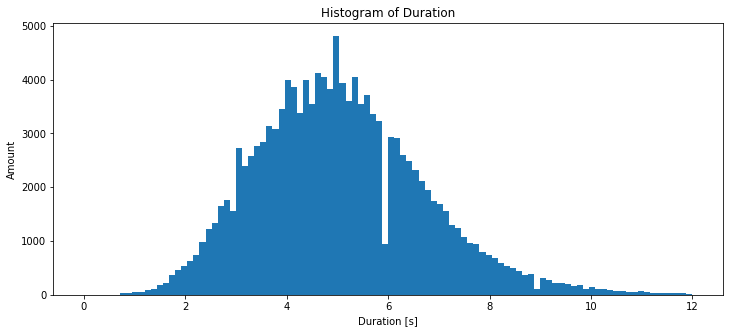

In [48]:
#https://matplotlib.org/gallery/statistics/hist.html
plt.figure(figsize=(12, 5))
plt.hist(durations, 100, (0,12))
plt.xlabel("Duration [s]")
plt.ylabel("Amount")
plt.title("Histogram of Duration")

### Audio Samples < 2s?

In [44]:
import IPython.display as ipd

In [56]:
# shortest audio file
min_index = np.argmin(durations)
files[min_index]
ipd.Audio(files[min_index])

## Conclusion
Let's discard files with duration < 2s.

Let's normalize all files to 5s.